In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi/bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi"))))

import bpepi


In [2]:
import networkx as nx
import numpy as np

In [58]:
N_graph=1000
p=0.01
G = nx.erdos_renyi_graph(N_graph, p=0.01)
G = nx.random_regular_graph(d=3, n=N_graph)
G = nx.balanced_tree(3,5)
N = G.number_of_nodes()
print(f"num of nodes {G.number_of_nodes()} ")
print(f"num of edges {G.number_of_edges()} ")
print(f"num of connected components {nx.number_connected_components(G)} ")

num of nodes 364 
num of edges 363 
num of connected components 1 


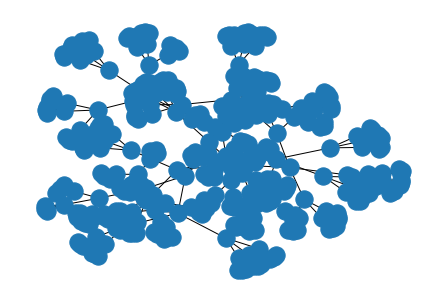

In [59]:
nx.draw(G)

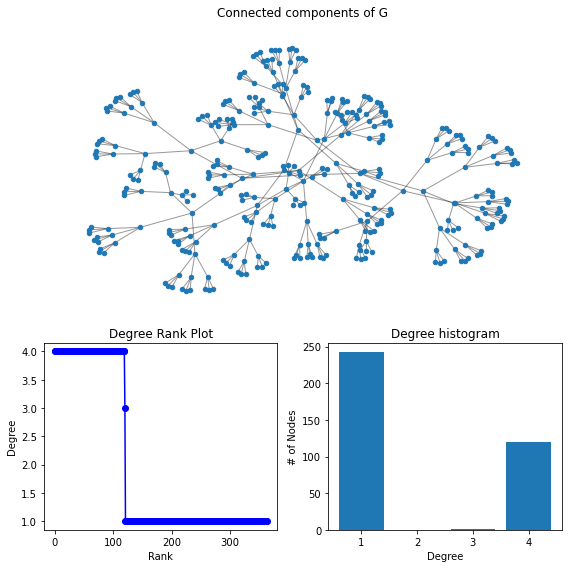

In [60]:
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


In [61]:
from bpepi.sim_on_cluster import generate_contacts
T=10
lamb_=1
contacts = generate_contacts(G, T, lamb_)
delta=1/N

In [62]:
from bpepi.fg import FactorGraph
fg_ = FactorGraph(N, T, contacts, [], delta)

In [63]:
fg_.update(tol=1e-10)

(7, 5.551115123125783e-17)

In [64]:
M = fg_.marginals()

In [65]:
M.shape

(364, 12)

In [67]:
M[:,0].sum()/N

0.6691872433337608